In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataFrame = pd.read_csv('voice.csv')

from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test=train_test_split(dataFrame[['meanfreq', 'sd', 'centroid', 'meanfun', 'IQR', 'median']], 
                                               dataFrame['label'], random_state=0)

print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))

X_train shape: (2376, 6)
y_train shape: (2376,)
X_test shape: (792, 6)
y_test shape: (792,)
1326      male
478       male
868       male
2539    female
1049      male
         ...  
763       male
835       male
1653    female
2607    female
2732    female
Name: label, Length: 2376, dtype: object


Test score for k=1: 97.3485%
Test score for k=5: 98.2323%


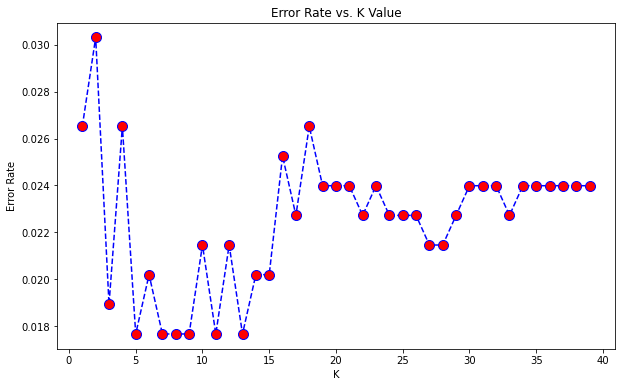

In [3]:
from sklearn.neighbors import KNeighborsClassifier

#Checking the accuracy of model for k=1
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("Test score for k=1: " + str(round((knn.score(X_test,y_test)*100), 4)) + '%')

#Using elbow method to find a good value of 'k' and thus improve the accuracy of the model
error_rate = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred_k = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_k != y_test))

#plotting error_rate vs k
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#from the graph it is clear that the optimum value of k occurs when the error is minimum
#so the value k = 5 will give maximum accuracy
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print("Test score for k=5: " + str(round((knn.score(X_test,y_test)*100), 4)) + '%')